# **Group ID:-** PTID-CDS-APR-24-1897
# **Project ID:-** PRCP-1002-HandwrittenDigits

## **About the Project**
*  A digit recognition system is a type of technology that can automatically identify and classify numerical characters, typically from 0 to 9. These systems are most commonly used to interpret handwritten digits,
*   Digit recognition system is the working of a machine to train itself or recognizing the digits from different sources like emails, bank cheque,
papers, images, etc.

*   In different real-world scenarios for online handwriting recognition on computer tablets or system, recognize number
plates of vehicles, processing bank cheque amounts, numeric entries in forms filled up by hand (say — tax forms) and so on


*   Here's a breakdown of how digit recognition systems work:

**Data Preprocessing**: The system takes an image of a digit as input. This image is then preprocessed to ensure consistency. Preprocessing may involve steps like resizing the image, converting it to grayscale, and thinning lines.

**Feature Extraction**: Key characteristics of the digit image are extracted. These features could be things like the distribution of black pixels, the number of endpoints (ends of lines), or the overall shape of the digit.

**Classification**: The extracted features are fed into a machine learning model that has been trained to recognize digits. Common algorithms used for digit recognition include K-nearest neighbors and convolutional neural networks (CNNs). CNNs are particularly effective due to their ability to learn complex patterns from data.

**Output**: The model outputs the most likely digit based on the extracted features.

## **Problems with handwritten digits**

The handwritten digits are not always of the same size, width, orientation and justified to margins as they differ from writing of person to
person, so the general problem would be while classifying the digits due to the similarity between digits such as 1 and 7, 5 and 6, 3 and 8, 2 and
5, 2 and 7, etc.

This problem is faced more when many people write a single digit with a variety of different handwritings. Lastly, the uniqueness and variety in the handwriting of different individuals also influence the formation and appearance of the digits.

Now we introduce the concepts and algorithms of deep learning and machine learning.

The provided Handwritten digits are images in the form of 28*28 gray scale intensities of images representing an image along with the first
column to be a label (0 to 9) for every image.

## **Aim of the project:-**
- Classify a given image of handwritten digit into one of the 10 classes representing integer values from **0** to **9**.
- Compare between various models and find the classifier that works best for the model.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

##**Loading Data**

- Loading the **mnist(Handwritten digit recognition dataset)** which is already stored in the keras dataset model.
- while loading the dataset it will be divided simultaneously into training and testing set samples.

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
# shapes of the datasets
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# unique_values in the y-train dataset
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# unique values in the y-test dataset
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# unique values in the X-train dataset
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# unique values in the X-test dataset
np.unique(X_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# max and min value from the unique values
np.max(np.unique(X_train)),np.min(np.unique(X_train))

(255, 0)

In [ ]:
# size of the datasets of X_train,X_test,y_train and y_test
X_train.size # no of data in that dataset

47040000

In [ ]:
X_test.size

7840000

In [ ]:
y_train.size

60000

In [ ]:
y_test.size

10000

## **Data Preprocessing**

### **Exploratory Data Analysis (EDA)**

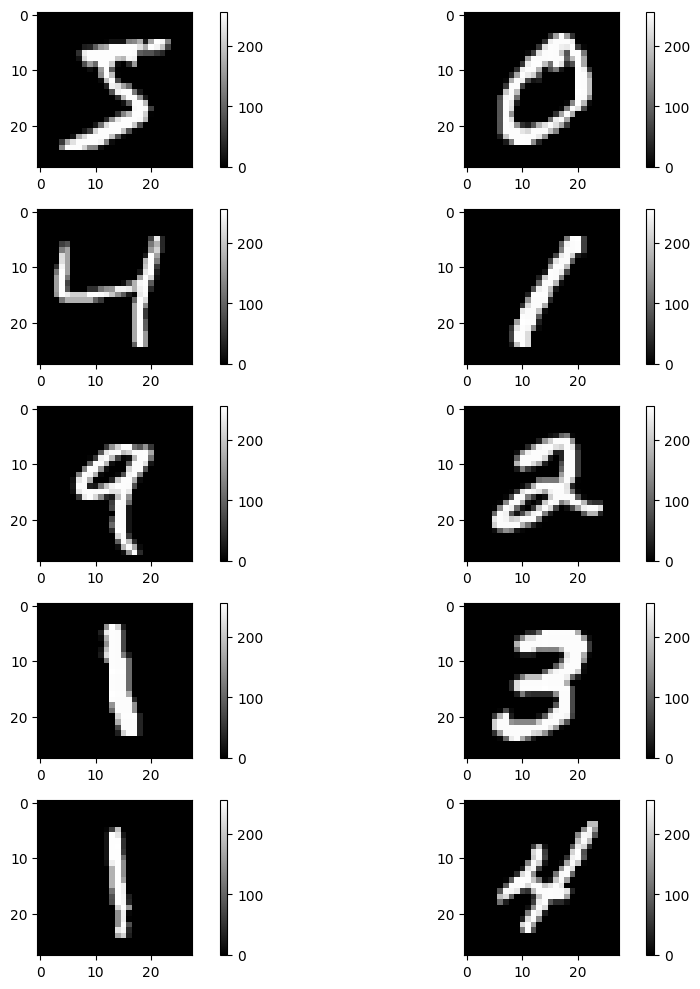

In [ ]:
# to check the first image of the dataset
plt.figure(figsize = (10,10))
plot_num = 1
for x in X_train:
  if plot_num <= 10:
    plt.subplot(5,2,plot_num)
    plt.imshow(x,cmap = 'gray')
    plt.colorbar()
    plot_num += 1
plt.tight_layout()
plt.show()

In [ ]:
X_train.ndim # Dimension of the X_train dataset

3

In [ ]:
y_train.ndim # Dimension of the y_train dataset

1

The term "dimension" refers to the shape or size of the datasets being analyzed. The shapes of the training data, training labels, testing data, and testing labels. This allows us to see the number of samples and features in the dataset.

In [ ]:
# the value of each pixel in X_train & X_test
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(X_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

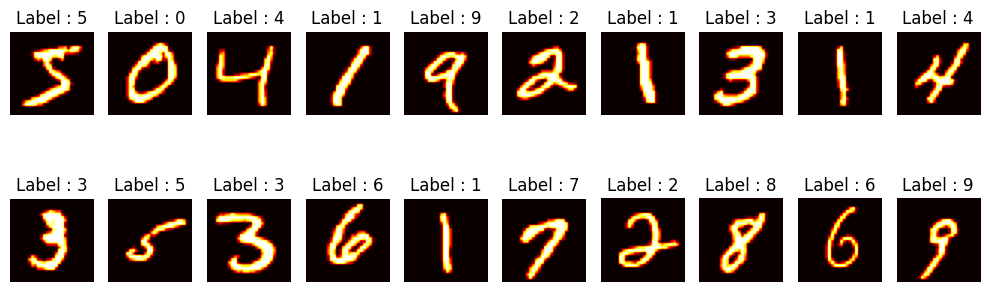

In [ ]:
# visualizing sample digits with labels
fig, axes = plt.subplots(2,10,figsize = (10,4))
axes = axes.ravel()

for i in range(20):
  axes[i].imshow(X_train[i],cmap = 'hot')
  axes[i].set_title('Label : {}'.format(y_train[i]))
  axes[i].axis('off')

plt.tight_layout()
plt.show()

## **Distribution of digits**

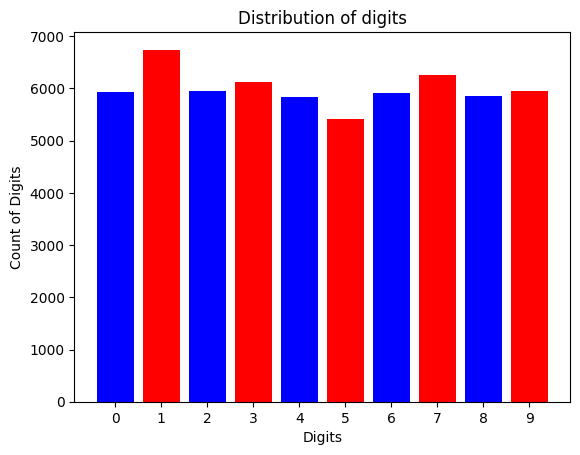

Distribution of Digits
Count of 0 : 5923
Count of 1 : 6742
Count of 2 : 5958
Count of 3 : 6131
Count of 4 : 5842
Count of 5 : 5421
Count of 6 : 5918
Count of 7 : 6265
Count of 8 : 5851
Count of 9 : 5949


In [ ]:
digit_counts = np.bincount(y_train)
digits = np.unique(y_train)
plt.bar(digits,digit_counts,color = ['blue','red'])
plt.xlabel('Digits')
plt.ylabel('Count of Digits')
plt.title('Distribution of digits')
plt.xticks(digits)
plt.show()

# Distribution of digits
print('Distribution of Digits')
for x,y in zip(digits,digit_counts):
  print(f'Count of {x} : {y}')

## **Model Creation for the Handwritten Digit Recognition**

In [ ]:
X_train.dtype,X_test.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
y_train.dtype,y_test.dtype

(dtype('uint8'), dtype('uint8'))

- First we will divide the training model into **training** and **Validation** set to subject it to the Sequential neural networks model for the purpose of training.

- Now we have to **scale** all the data accordingly(X_train, X_val and X_test) so that all the features contribute equally to the model learning process. and that there will no hierarchy in range of datas.


In [ ]:
X_train,X_val = X_train[5000:],X_train[:5000]

# By dividing each value in the dataset with the largest pixel intensity value every pixel value in the data will scaleback to the value of 0 and 1.

X_train,X_val,X_test = X_train/255.0, X_val/255.0,X_test/255.0

# After dividing by the float value the dataset will automatically convert to float datatype. which will be easier to handle in model creation and processing.

y_train,y_val = y_train[5000:],y_train[:5000]
# we will also divide the output class label dataset(y_train) into train and validation set


In [ ]:
X_train.shape,X_val.shape

((55000, 28, 28), (5000, 28, 28))

In [ ]:
y_train.shape,y_val.shape

((55000,), (5000,))

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_val[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Reshaping the input and validation data

num_samples_train, height, width = X_train.shape
num_samples_test = X_test.shape[0]
num_samples_val = X_val.shape[0]

X_train_2D = np.reshape(X_train,(num_samples_train, height * width))
X_test_2D = np.reshape(X_test,(num_samples_test,height * width))
X_val_2D = np.reshape(X_val,(num_samples_val,height * width))
X_train_2D.shape

(55000, 784)

In [ ]:
X_val_2D.shape

(5000, 784)

In [ ]:
X_test_2D.shape

(10000, 784)

## **Machine Learning Algorithms**

- First we will try presenting the mnist(handwritten digit recognition) data to our famous **Support Vector Machines(Support Vector Classifiers)** and **K-Nearest Neighbors Classifier** machine learning models and see how it performs.

## **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf')
svm_classifier.fit(X_train_2D,y_train)

SVC()

In [ ]:
# Validating our model by subjecting it to the test datasets
svm_predictions = svm_classifier.predict(X_test_2D)
svm_predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# using a flattened test dataset to make predictions
# X_test.reshape(X_test.shape[0],-1)

## **Evaluation metrics**

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
svm_accuracy = accuracy_score(y_test,svm_predictions)

print('Accuracy score of the model : ',svm_accuracy)

Accuracy score of the model :  0.9786


In [ ]:
# Precision Score
svm_precision = precision_score(y_test,svm_predictions,average = 'weighted')
# average = 'weighted', when there is an imbalanced classes in the testing dataset.

print('Precision score of the model : ',svm_precision)

Precision score of the model :  0.9786034547070367


In [ ]:
# Recall Score
svm_recall = recall_score(y_test,svm_predictions,average = 'weighted')
print('Recall score of the model : ',svm_recall)

Recall score of the model :  0.9786


In [ ]:
# F1 Score
svm_f1_score = f1_score(y_test,svm_predictions,average = 'weighted')
print('F1 score of the model : ',svm_f1_score)

F1 score of the model :  0.9785883574212496


In [ ]:
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
svm_confusion = confusion_matrix(y_test,svm_predictions)

print('************************* SVM Confusion Matrix ***************************')
pd.DataFrame(svm_confusion)

************************* SVM Confusion Matrix ***************************


,0,1,2,3,4,5,6,7,8,9
0,972,0,1,0,0,2,2,1,2,0
1,0,1126,3,1,0,1,1,1,2,0
2,6,2,1007,2,1,0,2,8,4,0
3,0,0,3,992,0,2,0,6,6,1
4,0,0,5,0,959,0,3,0,2,13
5,2,0,0,9,0,871,4,1,4,1
6,6,2,0,0,2,3,943,0,2,0
7,0,6,12,1,1,0,0,996,2,10
8,3,0,2,6,4,2,3,2,949,3
9,3,4,1,8,9,1,1,7,4,971


In [ ]:
no_of_unique_values = np.bincount(y_test)
unique_values = np.unique(y_test)
for x,y in zip(unique_values,no_of_unique_values):
  print(f'Label {x} : {y}')

Label 0 : 980
Label 1 : 1135
Label 2 : 1032
Label 3 : 1010
Label 4 : 982
Label 5 : 892
Label 6 : 958
Label 7 : 1028
Label 8 : 974
Label 9 : 1009


In [ ]:
# Creating a Classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test,svm_predictions)
print('***************** SVM Classification Report *************************')
print(class_report)


***************** SVM Classification Report *************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



- Our SVM(Support vector classifier) model has achieved a **accuracy** and **f1-score** of **0.9792** and **0.9792**. which is an impressive score for the model in recognizing handwritten digits.

## K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_2D,y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(X_test_2D)
knn_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# Calculating metrics to evaluate the model predictions

knn_accuracy = accuracy_score(y_pred = knn_pred,y_true = y_test)
knn_precision = precision_score(y_true = y_test,y_pred = knn_pred,average = 'weighted')
knn_recall = recall_score(y_true = y_test,y_pred = knn_pred,average = 'weighted')
knn_f1_score = f1_score(y_true = y_test,y_pred = knn_pred,average = 'weighted')

print('Accuracy for the knn model : ',knn_accuracy)
print('Precision for the knn model : ',knn_precision)
print('Recall for the knn model : ',knn_recall)
print('F1 score for the knn model : ',knn_f1_score)

Accuracy for the knn model :  0.9679
Precision for the knn model :  0.9681512899921212
Recall for the knn model :  0.9679
F1 score for the knn model :  0.9678373630563024


In [ ]:
# Confusion matrix for the KNN model
from sklearn.metrics import confusion_matrix,classification_report

knn_confusion_matrix = confusion_matrix(y_true = y_test,y_pred = knn_pred)
print('********** KNN Confusion Matrix ******************')
pd.DataFrame(knn_confusion_matrix)

********** KNN Confusion Matrix ******************


,0,1,2,3,4,5,6,7,8,9
0,974,1,1,0,0,1,2,1,0,0
1,0,1132,2,0,0,0,0,0,0,1
2,11,8,989,2,1,0,2,16,3,0
3,0,3,3,977,1,13,1,6,2,4
4,3,7,0,0,943,0,5,2,1,21
5,5,0,0,13,2,861,3,2,2,4
6,5,3,0,0,3,2,945,0,0,0
7,0,21,4,0,3,0,0,989,0,11
8,9,4,6,13,7,15,5,5,906,4
9,5,7,3,9,6,3,1,10,2,963


In [ ]:
knn_classification_report = classification_report(y_true = y_test,y_pred = knn_pred)
# knn_classification_report - always use a print statement to get a proper tabular data
print('======================= Classification Report ========================')
print(knn_classification_report)

======================= Classification Report ========================
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



 **KNN model** gave us the accuracy and f1 score of **0.967** and **0.967**, which is an impressive score for a model used for the handwritten digits recognition project.

- We will also try an ensemble model to check to see, how it performs with the handwritten dataset. So for that we will use **Random Forest Classifier Model**

## **Random Forest  Classifier Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_2D,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# making predictions
y_pred_rfc = rfc.predict(X_test_2D)
y_pred_rfc

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
rfc_accuracy = accuracy_score(y_pred = y_pred_rfc,y_true = y_test)
rfc_precision = precision_score(y_true = y_test,y_pred = y_pred_rfc,average = 'weighted')
rfc_recall = recall_score(y_true = y_test,y_pred = y_pred_rfc,average = 'weighted')
rfc_f1_score = f1_score(y_true = y_test,y_pred = y_pred_rfc,average = 'weighted')

print('Accuracy for the knn model : ',rfc_accuracy)
print('Precision for the knn model : ',rfc_precision)
print('Recall for the knn model : ',rfc_recall)
print('F1 score for the knn model : ',rfc_f1_score)

Accuracy for the knn model :  0.9712
Precision for the knn model :  0.9712001226729607
Recall for the knn model :  0.9712
F1 score for the knn model :  0.9711857663378023


In [ ]:
# Confusion Matrix of the Random classifier model
from sklearn.metrics import confusion_matrix,classification_report

rfc_confusion_matrix = confusion_matrix(y_true = y_test,y_pred = y_pred_rfc)
print('********** Random Forest Confusion Matrix ******************')
pd.DataFrame(rfc_confusion_matrix)

********** Random Forest Confusion Matrix ******************


,0,1,2,3,4,5,6,7,8,9
0,971,0,1,0,0,2,2,1,3,0
1,0,1123,2,2,1,2,3,0,1,1
2,5,0,998,4,3,1,4,10,7,0
3,0,0,8,975,1,6,0,9,7,4
4,1,0,3,0,958,0,5,0,2,13
5,4,0,0,10,2,862,6,1,5,2
6,7,3,1,0,4,2,938,0,3,0
7,1,3,20,0,0,0,0,991,5,8
8,3,0,6,6,4,5,3,5,932,10
9,6,5,1,11,8,3,0,5,6,964


In [ ]:
rfc_classification_report = classification_report(y_true = y_test,y_pred = y_pred_rfc)
# classification_report - always use a print statement to get a proper tabular data
print('======================= Classification Report for Random Forest Classifier ========================')
print(rfc_classification_report)

======================= Classification Report for Random Forest Classifier ========================
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**Random Forest Classifier** Ensemble Model performed excellent by  scoring **0.97** and **0.97** for both **Accuracy** and **F1_score**. classifying all the image data properly into their necessary class labels.

## **Artificial Neural Network (Sequential Model)**

- A sequential model is a type of neural network architecture in which data flows in sequential order, one layer after the other.
- In other words, the output from one layer is fed as input to the other layer.

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_val.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Artificial neural network model
import tensorflow as tf
tf.__version__

'2.15.0'

## Sequential Model-1 (Using Stochastic Gradient Optimizer and Sparse categorical cross entropy loss function)- MultiLabel Classification problem.

- Here we will use **X_train** to train the neural network and simultaneously validate our model with the **X_val(validation dataset)**, so that we will get to see our model performance by evaluating the validation set with respect to training set.

- ### For a Multilabel classification problem we have to use **'sigmoid'** activation function at the output layer of the neural network.

In [ ]:
# setting the seed for reproducibility
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Creating our Sequential model

nn_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28),name = 'Input_Layer'),
    tf.keras.layers.Dense(128,activation = 'relu',kernel_initializer = 'he_normal',name = 'Hidden_Layer_1'),
    tf.keras.layers.Dense(64,activation = 'relu',kernel_initializer = 'he_normal',name = 'Hidden_Layer_2'),
    tf.keras.layers.Dense(10,activation = 'sigmoid',name = 'Output_Layer')
])

# Compile the model
nn_1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), # stochastic gradient descent optimizer
    metrics = ['accuracy']
)

# Fit the model with the training data
hist_1 = nn_1.fit(
    X_train,
    y_train,
    epochs = 50,
    validation_data = (X_val,y_val),
    batch_size = 32
    )

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5952 - accuracy: 0.8420 - val_loss: 0.2979 - val_accuracy: 0.9196
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2875 - accuracy: 0.9176 - val_loss: 0.2393 - val_accuracy: 0.9316
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2390 - accuracy: 0.9314 - val_loss: 0.2031 - val_accuracy: 0.9450
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2067 - accuracy: 0.9409 - val_loss: 0.1844 - val_accuracy: 0.9490
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1824 - accuracy: 0.9479 - val_loss: 0.1676 - val_accuracy: 0.9516
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1631 - accuracy: 0.9532 - val_loss: 0.1536 - val_accuracy: 0.9574
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1474 - accuracy: 0.9578 - val_loss: 0.1428 - val_accuracy:

In [ ]:
# Summary of our model
nn_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Extracting some information from the model
nn_1.get_config()

{'name': 'sequential_9',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'Input_Layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'Input_Layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'Hidden_Layer_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'cl

In [ ]:
# Evaluating our model with the test data
loss,accuracy = nn_1.evaluate(X_test,y_test)
print('Loss Value : ',loss)
print('Accuracy value from the Testset will be : ',accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9770
Loss Value :  0.07369790971279144
Accuracy value from the Testset will be :  0.9769999980926514


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Actual/True Values')

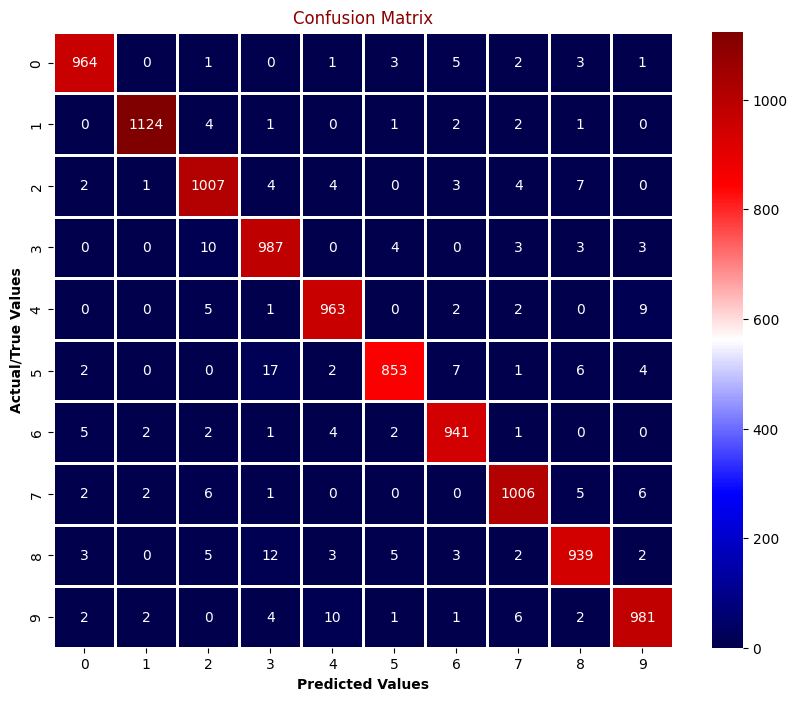

In [ ]:
# Determining Confusion matrix for our model

y_pred_nn_1 = nn_1.predict(X_test)
y_pred_labels1 = [np.argmax(i) for i in y_pred_nn_1]
cm1 = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_labels1)

# Displaying our confusion matrix
plt.figure(figsize=(10,8))

sns.heatmap(cm1,annot = True,cmap = 'seismic',linewidths = 1,fmt = 'd')
plt.title('Confusion Matrix',color = 'darkred',fontsize = 12)
plt.xlabel('Predicted Values',fontweight = 'semibold')
plt.ylabel('Actual/True Values',fontweight = 'semibold')

In [ ]:
y_pred_nn_1[0:2].round(2)

array([[0.04, 0.04, 0.99, 1.  , 0.  , 0.6 , 0.  , 1.  , 0.73, 0.85],
       [0.67, 1.  , 1.  , 1.  , 0.  , 0.08, 0.57, 0.  , 0.98, 0.  ]],
      dtype=float32)

In [ ]:
# Creating a history Dataframe
pd.DataFrame(hist_1.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.595173,0.842036,0.297949,0.9196
1,0.287490,0.917600,0.239260,0.9316
2,0.238987,0.931436,0.203054,0.9450
3,0.206710,0.940873,0.184423,0.9490
4,0.182381,0.947873,0.167620,0.9516


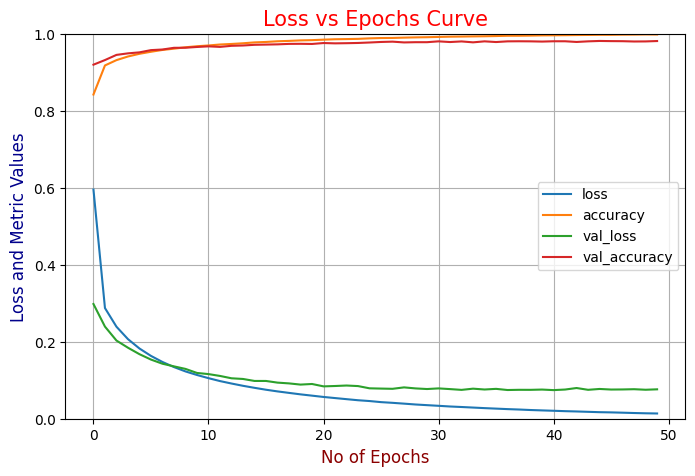

In [ ]:
# plotting the loss curve to visualize our models performance
pd.DataFrame(hist_1.history).plot(figsize = (8,5))
plt.xlabel('No of Epochs',fontsize = 12,color = 'darkred')
plt.ylabel('Loss and Metric Values',fontsize = 12,color = 'darkblue')
plt.title('Loss vs Epochs Curve',fontsize = 15,color = 'red')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.grid(True)
plt.ylim(0,1)
plt.show()

- By using **SGD(stochastic gradient descent)** as an optimizer we got an impressive **98% ~(0.977)** **accuracy** in the evaluation of our model.

## Sequential Model - 2 (Using Adam Optimizer and Sparse categorical cross entropy loss function)- MultiLabel Classification problem.

In [ ]:
# setting the seed for reproducibility
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Creating out ANN Sequential Model

nn_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28),name = 'Input_Layer'),

# Flattening or reshaping the data in digital image processing typically refers to converting the multi-dimensional array representing an image into a one-dimensional array.
# This process is often necessary or beneficial for various image processing tasks.

    tf.keras.layers.Dense(128,activation = 'relu',kernel_initializer = 'he_normal',name = 'Hidden_Layer_1'),
    tf.keras.layers.Dense(64,activation = 'relu',kernel_initializer = 'he_normal',name = 'Hidden_Layer_2'),
    tf.keras.layers.Dense(10,activation = 'sigmoid',name = 'Output_Layer')
])

# Compiling the model
nn_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # Adam optimizer
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

# Fitting the model
hist_2 = nn_2.fit(
    X_train,
    y_train,
    epochs = 25,
    validation_data = (X_val,y_val),
    batch_size = 32)

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.2460 - accuracy: 0.9274 - val_loss: 0.1398 - val_accuracy: 0.9590
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1047 - accuracy: 0.9679 - val_loss: 0.0928 - val_accuracy: 0.9718
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0749 - accuracy: 0.9764 - val_loss: 0.0742 - val_accuracy: 0.9762
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0942 - val_accuracy: 0.9724
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0838 - val_accuracy: 0.9784
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 0.0740 - val_accuracy: 0.9794
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0913 - val_accuracy

In [ ]:
nn_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Extracting some information from the model
nn_2.get_config()

{'name': 'sequential_10',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'Input_Layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'Input_Layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'Hidden_Layer_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'c

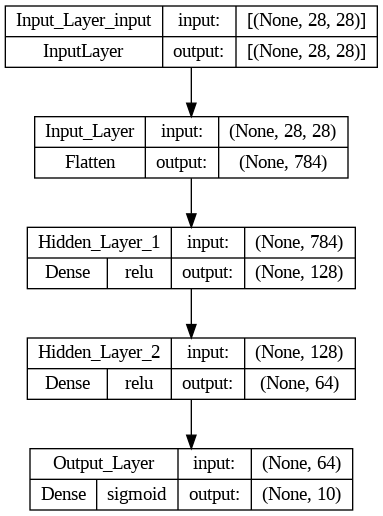

In [ ]:
# Visualizing the neural network

from tensorflow.keras.utils import plot_model
plot_model(nn_2,show_shapes = True,show_layer_activations = True)

In [ ]:
# Now Evaluating our model with the test data
loss,accuracy = nn_2.evaluate(X_test,y_test)
print('Loss Value : ',loss)
print('Accuracy value from the Testset will be : ',accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.1430 - accuracy: 0.9771
Loss Value :  0.14298272132873535
Accuracy value from the Testset will be :  0.9771000146865845


313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Actual/True Values')

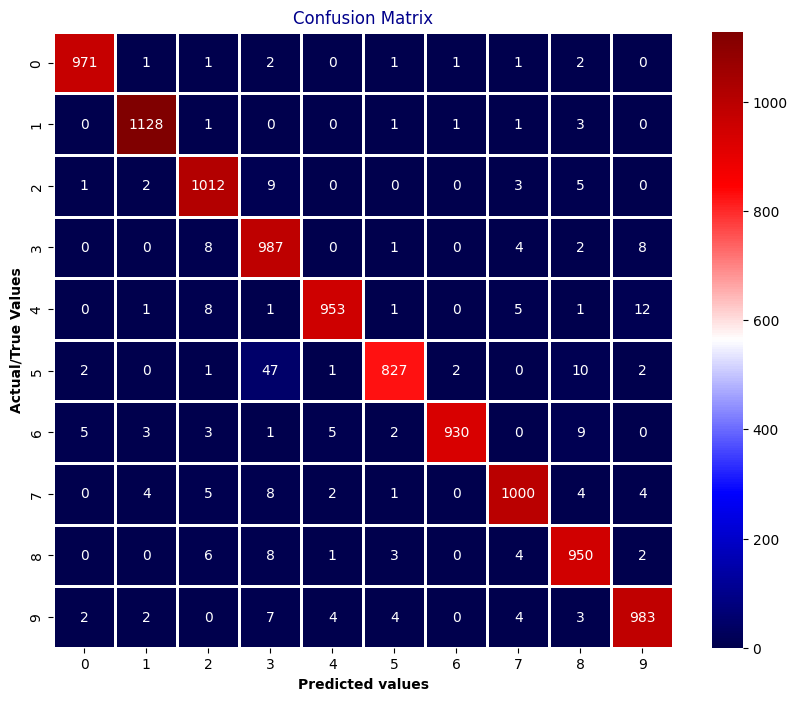

In [ ]:
# Determining confusion metrics to our model
y_pred_nn_2 = nn_2.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred_nn_2]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_labels)
# print(cm)

# Displaying confusion matrix
plt.figure(figsize=(10,8))

sns.heatmap(cm,annot = True,cmap = 'seismic',fmt = 'd',linewidth = 1)
plt.title('Confusion Matrix',color = 'darkblue',fontsize = 12)
plt.xlabel('Predicted values',fontweight = 'semibold')
plt.ylabel('Actual/True Values',fontweight = 'semibold')

In [ ]:
y_pred_nn_2[0:2].round(2)

array([[0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.01],
       [0.  , 0.79, 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
# Creating a history Dataframe
pd.DataFrame(hist_2.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.246017,0.927382,0.139837,0.9590
1,0.104743,0.967891,0.092757,0.9718
2,0.074882,0.976436,0.074160,0.9762
3,0.055077,0.982345,0.094191,0.9724
4,0.044106,0.985764,0.083764,0.9784


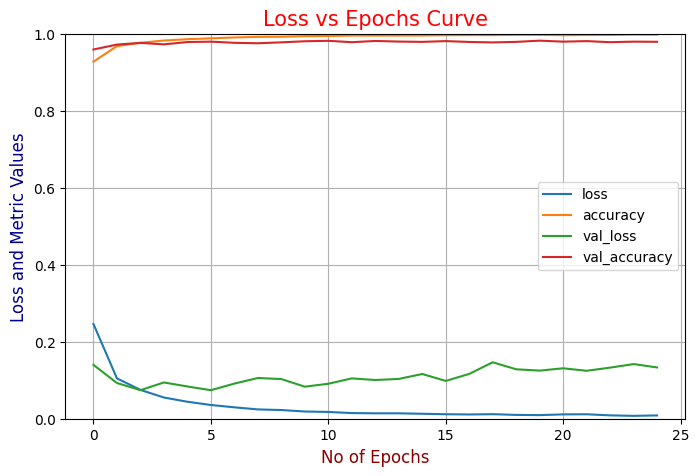

In [ ]:
# plotting the loss curve to visualize our models performance
pd.DataFrame(hist_2.history).plot(figsize = (8,5))
plt.xlabel('No of Epochs',fontsize = 12,color = 'darkred')
plt.ylabel('Loss and Metric Values',fontsize = 12,color = 'darkblue')
plt.title('Loss vs Epochs Curve',fontsize = 15,color = 'red')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.grid(True)
plt.ylim(0,1)
plt.show()

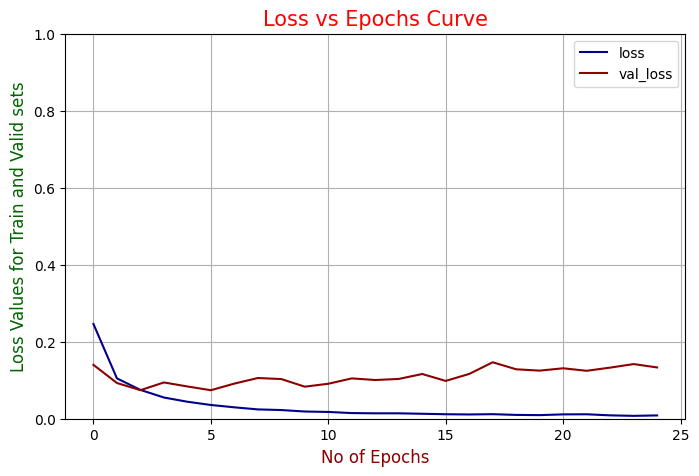

In [ ]:
pd.DataFrame(hist_2.history)[['loss','val_loss']].plot(figsize = (8,5),color = ['darkblue','darkred'])
plt.xlabel('No of Epochs',fontsize = 12,color = 'darkred')
plt.ylabel('Loss Values for Train and Valid sets',fontsize = 12,color = 'darkgreen')
plt.title('Loss vs Epochs Curve',fontsize = 15,color = 'red')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.grid(True)
plt.ylim(0,1)
plt.show()

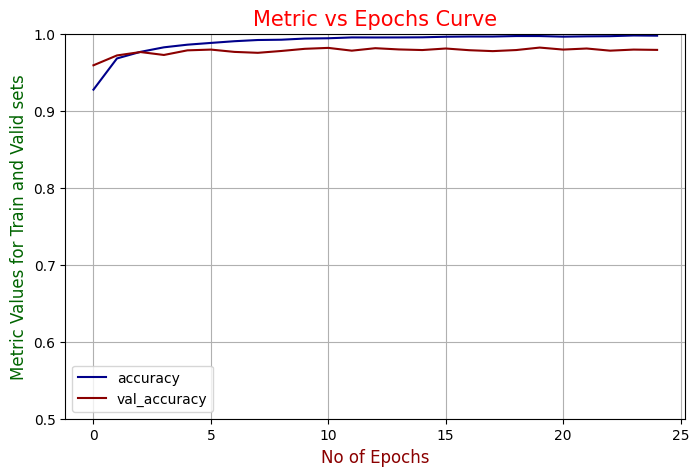

In [ ]:
pd.DataFrame(hist_2.history)[['accuracy','val_accuracy']].plot(figsize = (8,5),color = ['darkblue','darkred'])
plt.xlabel('No of Epochs',fontsize = 12,color = 'darkred')
plt.ylabel('Metric Values for Train and Valid sets',fontsize = 12,color = 'darkgreen')
plt.title('Metric vs Epochs Curve',fontsize = 15,color = 'red')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.grid(True)
plt.ylim(0.5,1)
plt.show()

For model-2 By using **Adam Optimizer** with a **learning rate of 0.01** we got an impressive **accuracy score** of **98% ~(0.977)** in the evaluation of our model results are similar as the previous model.

## Sequential Model - 3 (Using Stochastic gradient descent as Optimizer and Categorical cross entropy as the loss function)- Multiclass classification problem.

In [ ]:
# first we have to perform One-Hot-Encoding to all the labels datasets
# we will use tensorflow keras 'to_categorical()' function to perform one hot encoding

# Example
# x = [4,2,5,0,1,1]
# tf.keras.utils.to_categorical(x,num_classes = 10)

len(y_train),len(y_test),len(y_val)

(55000, 10000, 5000)

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train,num_classes = 10) # num_classes refers to the num of target classes in our dataset
y_test_cat = tf.keras.utils.to_categorical(y_test,num_classes = 10)
y_val_cat = tf.keras.utils.to_categorical(y_val,num_classes = 10)

In [ ]:
y_train_cat.shape,y_test_cat.shape,y_val_cat.shape

((55000, 10), (10000, 10), (5000, 10))

In [ ]:
# comparison between a value in 'y_train' to a one-hot encoded categorical value in 'y_train_cat'
y_train[0],y_train_cat[0]

(7, array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

- ### For a Multiclass classification problem we have to use **'softmax'** activation function at the output layer of the neural network.

In [ ]:
# Set random seed
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Creating our Sequential model
nn_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28),name = 'Input_Layer'),
    tf.keras.layers.Dense(128,activation = 'relu',kernel_initializer = 'he_normal',name = 'Hidden_Layer_1'),
    tf.keras.layers.Dense(64,activation = 'relu',kernel_initializer = 'he_normal',name = 'Hidden_Layer_2'),
    tf.keras.layers.Dense(10,activation = 'softmax',name = 'Output_Layer') # softmax activation function
])

# Compile the model
nn_3.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit the model
hist_3 = nn_3.fit(
        X_train,
        y_train_cat,
        validation_data = (X_val,y_val_cat),
        batch_size = 32,
        epochs = 50
        )

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5952 - accuracy: 0.8420 - val_loss: 0.2979 - val_accuracy: 0.9196
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2875 - accuracy: 0.9176 - val_loss: 0.2393 - val_accuracy: 0.9316
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2390 - accuracy: 0.9314 - val_loss: 0.2031 - val_accuracy: 0.9450
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2067 - accuracy: 0.9409 - val_loss: 0.1844 - val_accuracy: 0.9490
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1824 - accuracy: 0.9479 - val_loss: 0.1676 - val_accuracy: 0.9516
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1631 - accuracy: 0.9532 - val_loss: 0.1536 - val_accuracy: 0.9574
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1474 - accuracy: 0.9578 - val_loss: 0.1428 - val_accuracy:

In [ ]:
# display the summary of the model
nn_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# extract information from the model
nn_3.get_config()

{'name': 'sequential_11',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'Input_Layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'Input_Layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'Hidden_Layer_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'c

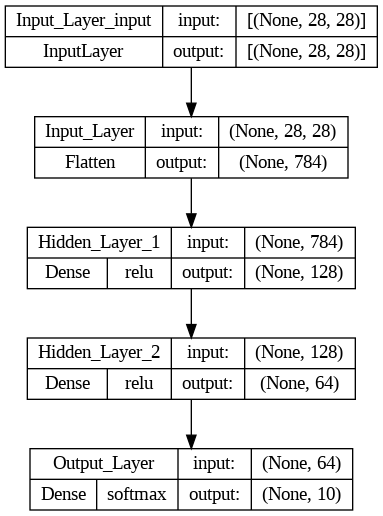

In [ ]:
# Visualizing our neural network
from tensorflow.keras.utils import plot_model
plot_model(nn_3,show_shapes = True,show_layer_activations = True,show_layer_names = True)

In [ ]:
# Evaluate our model with the test data
loss,accuracy = nn_3.evaluate(X_test,y_test_cat)
print('Loss Value : ',loss)
print('Accuracy value from the Testset will be : ',accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9770
Loss Value :  0.07369790971279144
Accuracy value from the Testset will be :  0.9769999980926514


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Actual Values')

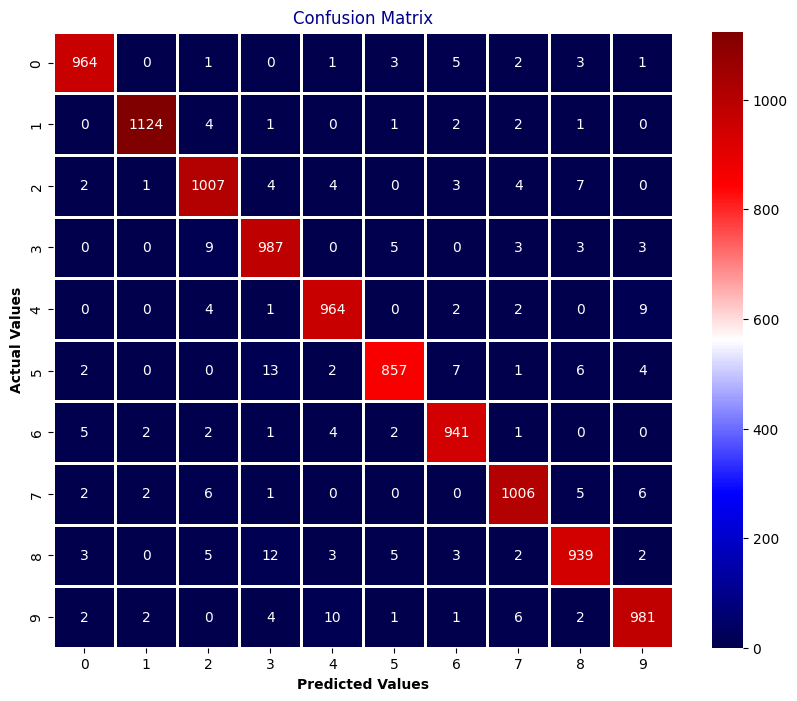

In [ ]:
# Determining confusion matrix for our model
y_pred_nn_3 = nn_3.predict(X_test)
y_pred_labels3 = [np.argmax(x) for x in y_pred_nn_3]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_labels3)

# Displaying confusion matrix
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'seismic',linewidths = 1)
plt.title('Confusion Matrix',color = 'darkblue',fontsize = 12)
plt.xlabel('Predicted Values',fontweight = 'semibold')
plt.ylabel('Actual Values',fontweight = 'semibold')

In [ ]:
pd.DataFrame(hist_3.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.595173,0.842036,0.297949,0.9196
1,0.287490,0.917600,0.239260,0.9316
2,0.238987,0.931436,0.203054,0.9450
3,0.206710,0.940873,0.184423,0.9490
4,0.182381,0.947873,0.167620,0.9516


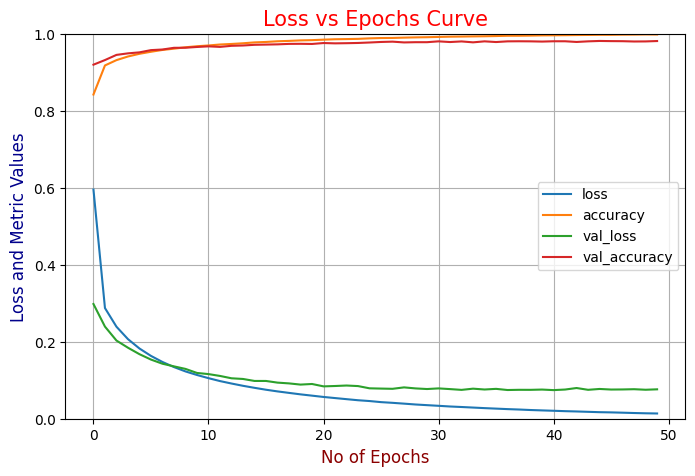

In [ ]:
# plotting the loss curve to visualize our models performance
pd.DataFrame(hist_3.history).plot(figsize = (8,5))
plt.xlabel('No of Epochs',fontsize = 12,color = 'darkred')
plt.ylabel('Loss and Metric Values',fontsize = 12,color = 'darkblue')
plt.title('Loss vs Epochs Curve',fontsize = 15,color = 'red')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.grid(True)
plt.ylim(0,1)
plt.show()

For model-3 By using **Stochastic gradient descent Optimizer**, we got an impressive **accuracy score** of **98% ~(0.9769)** in the evaluation of our model results.

## Sequential Model-4 (Using Adam Optimizer and Categorical cross entropy)- Multiclass Classification Problem.

In [ ]:
# Set random seed
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Creating our model

nn_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28),name = 'Input_Layer'),
    tf.keras.layers.Dense(128,activation = 'relu',kernel_initializer = 'he_normal',name = 'Hidden_Layer_1'),
    tf.keras.layers.Dense(64,activation = 'relu',kernel_initializer = 'he_normal',name = 'Hidden_Layer_2'),
    tf.keras.layers.Dense(10,activation = 'softmax',name = 'Output_Layer')
])

# Compiling our model

nn_4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# fit the model
hist_4 = nn_4.fit(
    X_train,
    y_train_cat,
    validation_data = (X_val,y_val_cat),
    batch_size = 32,
    epochs = 25
)


Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.2460 - accuracy: 0.9274 - val_loss: 0.1398 - val_accuracy: 0.9590
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1047 - accuracy: 0.9679 - val_loss: 0.0928 - val_accuracy: 0.9718
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0749 - accuracy: 0.9764 - val_loss: 0.0742 - val_accuracy: 0.9762
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0942 - val_accuracy: 0.9724
Epoch 5/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0838 - val_accuracy: 0.9784
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 0.0740 - val_accuracy: 0.9794
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0913 - val_accuracy

In [ ]:
nn_4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nn_4.get_config()

{'name': 'sequential_12',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'Input_Layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'Input_Layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'Hidden_Layer_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'c

In [ ]:
# Evaluate our model with the test data
loss,accuracy = nn_4.evaluate(X_test,y_test_cat)
print('Loss Value : ',loss)
print('Accuracy value from the Testset will be : ',accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1430 - accuracy: 0.9771
Loss Value :  0.14298272132873535
Accuracy value from the Testset will be :  0.9771000146865845


313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Actual Values')

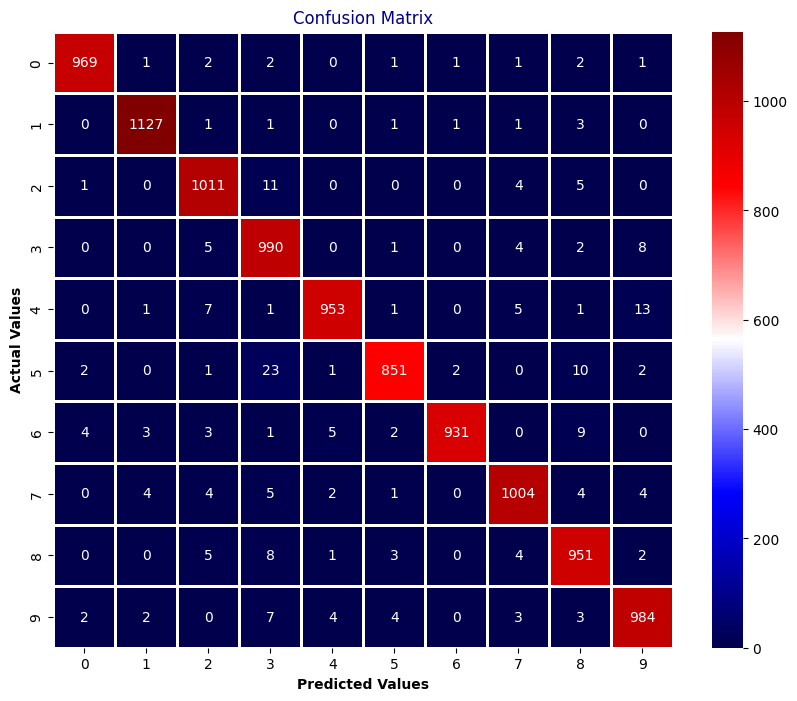

In [ ]:
# Determining confusion matrix for our model
y_pred_nn_4 = nn_4.predict(X_test)
y_pred_labels4 = [np.argmax(x) for x in y_pred_nn_4]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_labels4)

# Displaying confusion matrix
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'seismic',linewidths = 1)
plt.title('Confusion Matrix',color = 'darkblue',fontsize = 12)
plt.xlabel('Predicted Values',fontweight = 'semibold')
plt.ylabel('Actual Values',fontweight = 'semibold')

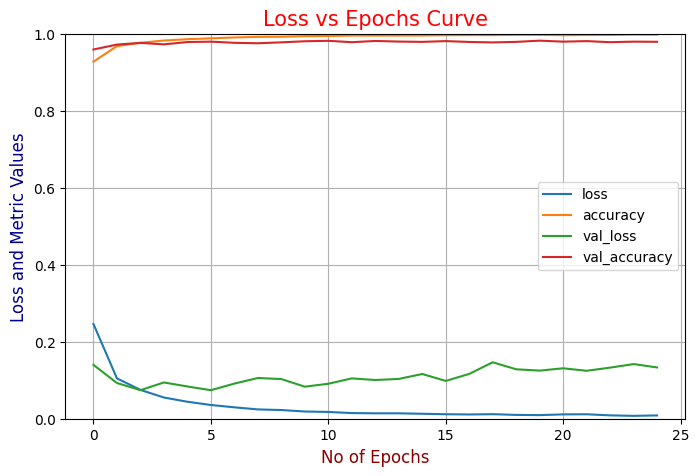

In [ ]:
# plotting the loss curve to visualize our models performance
pd.DataFrame(hist_4.history).plot(figsize = (8,5))
plt.xlabel('No of Epochs',fontsize = 12,color = 'darkred')
plt.ylabel('Loss and Metric Values',fontsize = 12,color = 'darkblue')
plt.title('Loss vs Epochs Curve',fontsize = 15,color = 'red')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.grid(True)
plt.ylim(0,1)
plt.show()

For model-4 By using **Adam Optimizer**, we got an impressive **accuracy score** of **98% ~(0.977)** in the evaluation of our model results same as the previous model.

## **Convolutional Neural Network** Sequential Model (Using Adam Optimizer and Categorical cross entropy)-Multilclass classification Model

In [ ]:
X_train.shape,X_test.shape,X_val.shape

((55000, 28, 28), (10000, 28, 28), (5000, 28, 28))

In [ ]:
# Reshaping the X_train,X_test and X_val to make it accessible for the CNN model
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)
X_val_cnn = X_val.reshape(-1,28,28,1)

In [ ]:
X_train_cnn.shape,X_test_cnn.shape,X_val_cnn.shape

((55000, 28, 28, 1), (10000, 28, 28, 1), (5000, 28, 28, 1))

In [ ]:
# Set random seed
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Create our CNN model

cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 2,
        activation = 'relu',
        input_shape = (28,28,1), # represents (height,width,channels)...
      # channels = 1 refers to Grayscale images & 3 refers to RGB images
        padding = 'valid',name = 'Input_Conv_Layer'
    ),
    tf.keras.layers.Conv2D(filters = 10,kernel_size = 2,activation = 'relu',name = 'Conv_Layer_1'),
    tf.keras.layers.MaxPool2D(pool_size = (3,3),strides = 1,padding = 'valid',name = 'Max_Pool_Layer_1'),
    # Maxpooling helps in reducing the spatial extent of the neural network model....
    # which inturn reduces the computation power required to run the model.

    tf.keras.layers.Conv2D(8,2,activation = 'relu',name = 'Conv_Layer_2'),
    tf.keras.layers.Conv2D(8,2,activation = 'relu',name = 'Conv_Layer_3'),
    tf.keras.layers.MaxPool2D(pool_size = (3,3),strides = 1,name = 'Max_Pool_Layer_2'),
    tf.keras.layers.Flatten(name = 'Flatten_Layer'),
    # Converts Multidimensional CNN output array into a one dimensional array which could be fed into the Deep neural network for analysing and categorizing features.
    tf.keras.layers.Dense(10,activation = 'softmax',name = 'Output_Layer')

])

# Compile the model
cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Fitting the model
hist_cnn = cnn.fit(
    X_train_cnn,
    y_train_cat,
    steps_per_epoch  = len(X_train)/32,
    epochs = 15,
    validation_data = (X_val_cnn,y_val_cat),
    validation_steps = len(X_val)/32
)

Epoch 1/15
1718/1718 [==============================] - 72s 41ms/step - loss: 0.1776 - accuracy: 0.9458 - val_loss: 0.0792 - val_accuracy: 0.9766
Epoch 2/15
1718/1718 [==============================] - 69s 40ms/step - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.0692 - val_accuracy: 0.9794
Epoch 3/15
1718/1718 [==============================] - 71s 42ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0579 - val_accuracy: 0.9820
Epoch 4/15
1718/1718 [==============================] - 70s 41ms/step - loss: 0.0495 - accuracy: 0.9845 - val_loss: 0.0512 - val_accuracy: 0.9844
Epoch 5/15
1718/1718 [==============================] - 69s 40ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0533 - val_accuracy: 0.9846
Epoch 6/15
1718/1718 [==============================] - 69s 40ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0405 - val_accuracy: 0.9870
Epoch 7/15
1718/1718 [==============================] - 70s 41ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0550 -

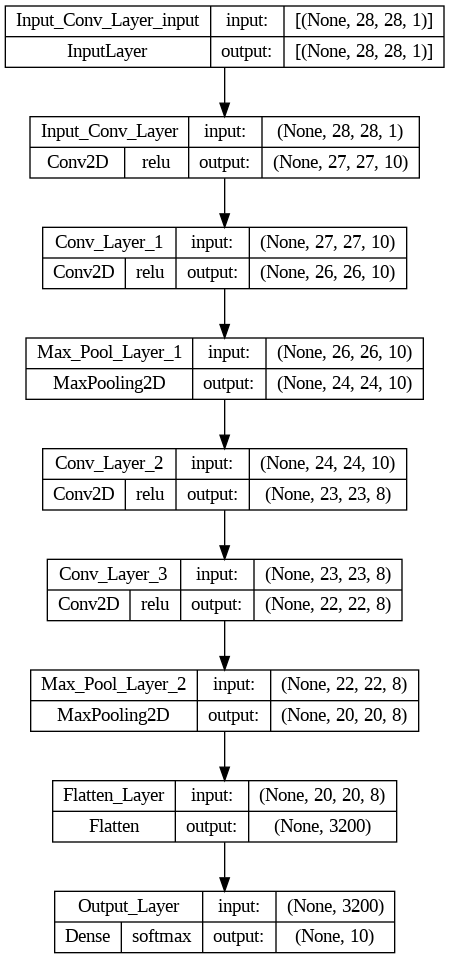

In [262]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_layer_names = True, show_layer_activations = True,show_shapes = True)

In [263]:
cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Conv_Layer (Conv2D)   (None, 27, 27, 10)        50        
                                                                 
 Conv_Layer_1 (Conv2D)       (None, 26, 26, 10)        410       
                                                                 
 Max_Pool_Layer_1 (MaxPooli  (None, 24, 24, 10)        0         
 ng2D)                                                           
                                                                 
 Conv_Layer_2 (Conv2D)       (None, 23, 23, 8)         328       
                                                                 
 Conv_Layer_3 (Conv2D)       (None, 22, 22, 8)         264       
                                                                 
 Max_Pool_Layer_2 (MaxPooli  (None, 20, 20, 8)         0         
 ng2D)                                               

In [264]:
loss_cnn,accuracy_cnn = cnn.evaluate(X_test_cnn,y_test_cat)
print('Loss Value : ',loss_cnn)
print('Accuracy value from the Testset will be : ',accuracy_cnn)

313/313 [==============================] - 9s 28ms/step - loss: 0.0527 - accuracy: 0.9865
Loss Value :  0.0526883602142334
Accuracy value from the Testset will be :  0.9865000247955322


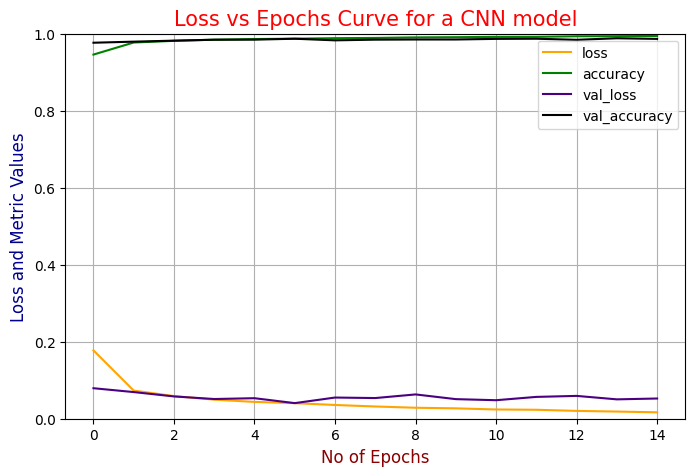

In [265]:
# plotting the loss curve to visualize our models performance
pd.DataFrame(hist_cnn.history).plot(figsize = (8,5),color = ['orange','green','indigo','black'])
plt.xlabel('No of Epochs',fontsize = 12,color = 'darkred')
plt.ylabel('Loss and Metric Values',fontsize = 12,color = 'darkblue')
plt.title('Loss vs Epochs Curve for a CNN model',fontsize = 15,color = 'red')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.grid(True)
plt.ylim(0,1)
plt.show()

**CNN** Model Achieved a fabulous **accuracy score** of **98% ~ (0.9865)** at the evaluation of our model, which is the highest score achieved so far among the models.

# **Best Model For Our Project**

### **Machine learning Models**.
- We have used Normal Machine learning models such as **K-Nearest-Neighbors** and **Support Vector Machines** to classify handwritten digits. They performed really well in all aspects of evaluation of the model such as accuracy,recall,precision and F1-score.
- **KNN (K-Nearest-Neighbors)** achieved an **Accuracy and F1_score** of **97% ~(0.967)**.
- Whereas **Support Vector Machines** achieved an impressive **Accuracy and F1_score** of **98% ~(0.979)** higher than KNN model.
- We also used an **Ensemble** Machine learning model called **'Random Forest Classifier'**,which also achieved an impressive **Accuracy and F1_score** of **97% ~(0.97)**.

### **Deep Learning Models**.
- To classify handwritten digits using depp learning models was necessary, so we used **Tensorflow.kera's Sequential Model** **(Artificial Neural Network Model)** for analysing and classifying handwritten digit images.
- **Sequential_model_1 (using stochastic gradient descent optimizer and sparse categorial cross entropy loss function)** which is a neural network model trained for **Multilabel Classification** problem (in which the Target labels from 0 to 9 were used.) achieved an **Accuracy** score of **(0.977) ~ 98%**.
- **Sequential_model_2 (using Adam optimizer and sparse categorial cross entropy loss function)** which is also a neural network model trained for **Multilabel Classification** problem achieved an **Accuracy** score of the same **(0.977) ~ 98%**.
- **Sequential_model_3 (using stochastic gradient descent optimizer and Categorial cross entropy loss function)** which is a neural network model trained for **MultiClass Classification** problem (in which the Target labels from 0 to 9 are one-hot encoded to allow for multiclass classification.) achieved an **Accuracy** score of same **(0.977) ~ 98%**.
- **Sequential_model_4 (using Adam optimizer and Categorial cross entropy loss function)** which is also a neural network model trained for **MultiClass Classification** problem achieved an **Accuracy** score of the same **(0.977) ~ 98%**.
- Finally we used **CNN (Convolutional Neural Network)** Model for a Multiclass Classification problem with Adam optimizer and Categorical cross entropy loss function, achieved a highest **Accuracy** Score of **(0.9865) ~98%**.

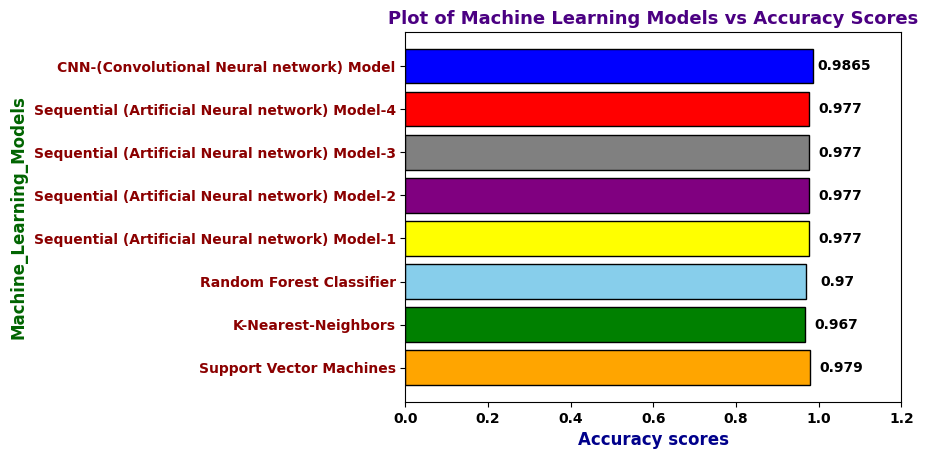

In [266]:
Accuracy_scores = [0.979,0.967,0.97,0.977,0.977,0.977,0.977,0.9865]
Machine_Learning_Models = ['Support Vector Machines','K-Nearest-Neighbors','Random Forest Classifier','Sequential (Artificial Neural network) Model-1',\
                           'Sequential (Artificial Neural network) Model-2','Sequential (Artificial Neural network) Model-3','Sequential (Artificial Neural network) Model-4','CNN-(Convolutional Neural network) Model']
plt.barh(Machine_Learning_Models,Accuracy_scores,edgecolor = 'black',color = ['orange','green','skyblue','yellow','purple','grey','red','blue'])

i = 0
for y in Accuracy_scores:
  plt.text(y + 0.075,i,f'{y}',ha = 'center',va = 'center',fontweight = 'semibold')
  i += 1

plt.title('Plot of Machine Learning Models vs Accuracy Scores',color = 'indigo',fontsize = 13,fontweight = 'semibold')
plt.ylabel('Machine_Learning_Models',color = 'darkgreen',fontsize = 12,fontweight = 'semibold')
plt.xlabel('Accuracy scores',color = 'darkblue',fontsize = 12,fontweight = 'semibold')
plt.yticks(fontweight = 'semibold',color = 'darkred')
plt.xticks(fontweight = 'semibold')
plt.xlim(0,1.2)
plt.show()

## **Conclusion**
- Based upon our results we would recommend **CNN(Convolutional Neural Network)** Model for our Handwritten Digits Recognition Project.
- It is mainly used to analyze images and extract features from it,which inturn help's us in classifying images into different categories. - As our data involved in the project are of images of handwritten digits, so we recommend CNN model to work with these images and extract feature information out of it, which helps in classifying the image to its respective category.
- The Advantage of **CNN** Model in comparison to **Normal Sequential Model** is that CNN model requires very **less** **parameters** to train the model, which reduces memory allocated to the model, computation hours and saves a lot of time in the progress of our project.
- From our project most of the sequential models have a total parameter count of **109386**, whereas CNN model have a total parameter count of only **33062**. This shows CNN model is reliable interms of saving memory and computation hours.

## **Challenges Faced**
- Subjecting the data to the Normal Machine learning models took a lot of time to analyze.
- Hyperparameter tuning our Machine learning models (such as **KNN & SVM**) took a lot of computation time to give us the optimum parameters for improvisation of our models.so finally we had to let go of the idea of hyperparameter tuning our models.
- Understanding and implementing **CNN** for our project was difficult.
- Lot of time was spent on computing the results of the Deep learning models(including CNN) because of the huge data that we were analysing, because we were using **CPU** to compute our project. The project could be made to compute faster if we had used a **GPU** instead of **CPU**.

- ### If we had made any mistakes or any procedures done incorrectly, feel free to give us corrections or any suggestions regarding that.